# Application of the alchemical free energy library "alchemlyb"

* Documentation can be found here: https://alchemlyb.readthedocs.io/en/latest/index.html
* Code on GitHub: https://github.com/alchemistry/alchemlyb
* Considered use case: decoupling of an electric neutral solute from a solution. 
* Here, a sequential perturbation of non-bonded interactions (dispersion only) with a total of 9 $\lambda$-points (l = [0,...,8]) is considered. 
* GROMACS dhdl-files are located in the folder "dhdl_files". 

In [1]:
#LOAD SOME MODULES 
#!alchemlyb needs to be installed!
import pandas as pd
import glob
from alchemlyb.parsing.gmx import extract_dHdl
from alchemlyb.estimators import TI
from alchemlyb.parsing.gmx import extract_u_nk
from alchemlyb.estimators import BAR, MBAR

Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.


In [2]:
#PARAMETERS
Temp = 300.0 #Absolute temperature [K]
RT = 8.314e-3*Temp #Thermal energy [kJ/mol]
lam_vdw_start = 0 #Lambda-point where VDW perturbation starts

In [3]:
#READ IN dhdl-FILES
filelist = glob.glob("dhdl_files/dhdl*.xvg")
filelist.sort()
filelist

['dhdl_files/dhdl.00.xvg',
 'dhdl_files/dhdl.01.xvg',
 'dhdl_files/dhdl.02.xvg',
 'dhdl_files/dhdl.03.xvg',
 'dhdl_files/dhdl.04.xvg',
 'dhdl_files/dhdl.05.xvg',
 'dhdl_files/dhdl.06.xvg',
 'dhdl_files/dhdl.07.xvg',
 'dhdl_files/dhdl.08.xvg',
 'dhdl_files/dhdl.09.xvg',
 'dhdl_files/dhdl.10.xvg']

# Free energy estimation using the BAR estimator

In [5]:
#ALL LAMBDA POINTS
u_nk = pd.concat([extract_u_nk(xvg, T=Temp) for xvg in filelist])

In [6]:
bar = BAR()
bar.fit(u_nk)
#print(RT*bar.d_delta_f_)
DG_tot_BAR = RT*bar.delta_f_[(0.0, 1.0, 1.0)][0]
err_DG_tot_BAR = RT*bar.d_delta_f_[(0.0, 1.0, 1.0)][0]

print('DG_tot = %5.3f +/- %5.3f kJ/mol' % (DG_tot_BAR, err_DG_tot_BAR))

DG_tot = 15.397 +/-   nan kJ/mol


# Free energy estimation using the TI estimator

In [7]:
#ALL LAMBDA POINTS
data_dHdl = pd.concat([extract_dHdl(xvg, T=Temp) for xvg in filelist])

In [8]:
ti = TI()
ti.fit(data_dHdl)
ti.delta_f_

,"(0.0, 0.0, 0.0)","(0.0, 0.0, 0.1)","(0.0, 0.0, 0.7)","(0.0, 0.0, 1.0)","(0.0, 0.2, 1.0)","(0.0, 0.35, 1.0)","(0.0, 0.5, 1.0)","(0.0, 0.63, 1.0)","(0.0, 0.71, 1.0)","(0.0, 0.8, 1.0)","(0.0, 1.0, 1.0)"
"(0.0, 0.0, 0.0)",0.000000,0.026281,0.147727,0.193179,2.418097,3.896520,5.089168,5.471037,5.265758,5.100828,6.025286
"(0.0, 0.0, 0.1)",-0.026281,0.000000,0.121446,0.166898,2.391816,3.870238,5.062887,5.444756,5.239476,5.074547,5.999005
"(0.0, 0.0, 0.7)",-0.147727,-0.121446,0.000000,0.045452,2.270370,3.748793,4.941441,5.323310,5.118031,4.953102,5.877559
"(0.0, 0.0, 1.0)",-0.193179,-0.166898,-0.045452,0.000000,2.224918,3.703340,4.895989,5.277858,5.072578,4.907649,5.832107
"(0.0, 0.2, 1.0)",-2.418097,-2.391816,-2.270370,-2.224918,0.000000,1.478422,2.671071,3.052940,2.847660,2.682731,3.607189
"(0.0, 0.35, 1.0)",-3.896520,-3.870238,-3.748793,-3.703340,-1.478422,0.000000,1.192649,1.574518,1.369238,1.204309,2.128767
"(0.0, 0.5, 1.0)",-5.089168,-5.062887,-4.941441,-4.895989,-2.671071,-1.192649,0.000000,0.381869,0.176589,0.011660,0.936118
"(0.0, 0.63, 1.0)",-5.471037,-5.444756,-5.323310,-5.277858,-3.052940,-1.574518,-0.381869,0.000000,-0.205280,-0.370209,0.554249
"(0.0, 0.71, 1.0)",-5.265758,-5.239476,-5.118031,-5.072578,-2.847660,-1.369238,-0.176589,0.205280,0.000000,-0.164929,0.759529
"(0.0, 0.8, 1.0)",-5.100828,-5.074547,-4.953102,-4.907649,-2.682731,-1.204309,-0.011660,0.370209,0.164929,0.000000,0.924458


In [9]:
#!dHdl-gradients are given in multiples of RT -> multiply by RT!
#print(RT*ti.delta_f_)
DG_tot_TI = RT*ti.delta_f_[(0.0, 1.0, 1.0)][0]
err_DG_tot_TI = RT*ti.d_delta_f_[(0.0, 1.0, 1.0)][0]

print('DG_tot = %5.3f +/- %5.3f kJ/mol' % (DG_tot_TI, err_DG_tot_TI))

DG_tot = 15.028 +/- 0.280 kJ/mol


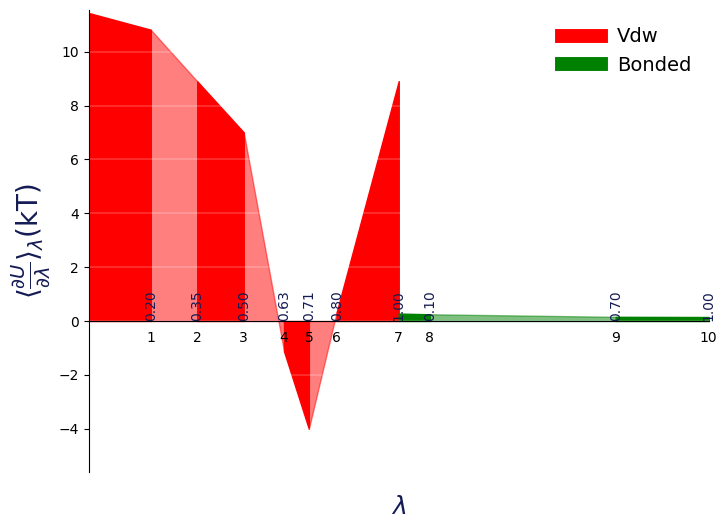

In [10]:
# dHdl plot
from alchemlyb.visualisation import plot_ti_dhdl
ax = plot_ti_dhdl(ti)
ax.figure.savefig('dhdl_TI.pdf', bbox_inches='tight')

# Free energy estimation using the MBAR estimator

In [12]:
#ALL LAMBDA POINTS
u_nk = pd.concat([extract_u_nk(xvg, T=Temp) for xvg in filelist])

In [13]:
mbar = MBAR()
mbar.fit(u_nk)
#print(RT*mbar.d_delta_f_)
DG_tot_MBAR = RT*mbar.delta_f_[(0.0, 1.0, 1.0)][0]
err_DG_tot_MBAR = RT*mbar.d_delta_f_[(0.0, 1.0, 1.0)][0]

print('DG_tot = %5.3f +/- %5.3f kJ/mol' % (DG_tot_MBAR, err_DG_tot_MBAR))

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


DG_tot = 15.425 +/- 0.239 kJ/mol


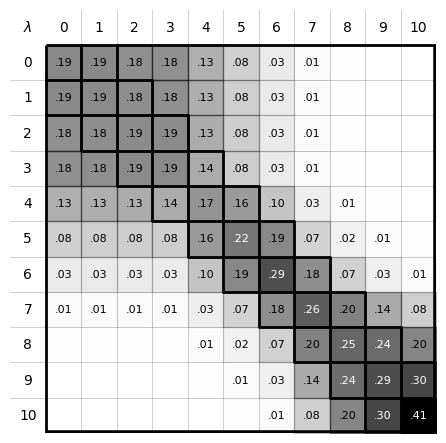

In [14]:
#PLOTTING OVERLAP MATRIX
from alchemlyb.visualisation import plot_mbar_overlap_matrix
ax = plot_mbar_overlap_matrix(mbar.overlap_matrix)
ax.figure.savefig('O_MBAR.pdf', bbox_inches='tight', pad_inches=0.0)

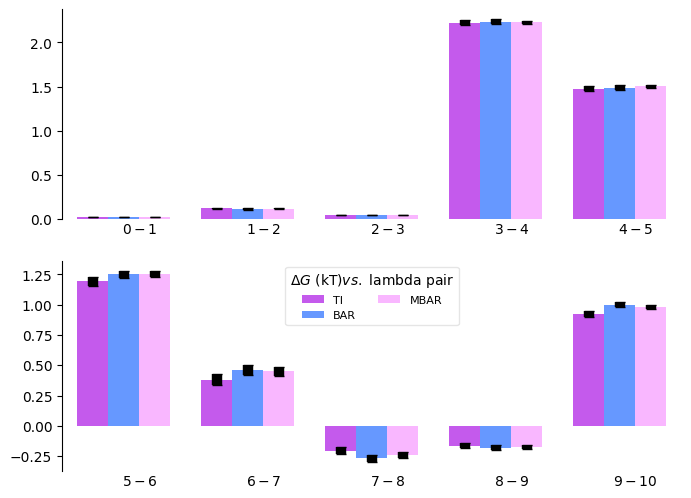

In [15]:
#plot df states
from alchemlyb.visualisation.dF_state import plot_dF_state
estimators = [(ti),(bar),(mbar)]
fig = plot_dF_state(estimators, orientation='portrait')
fig.savefig('dF_state.pdf', bbox_inches='tight')

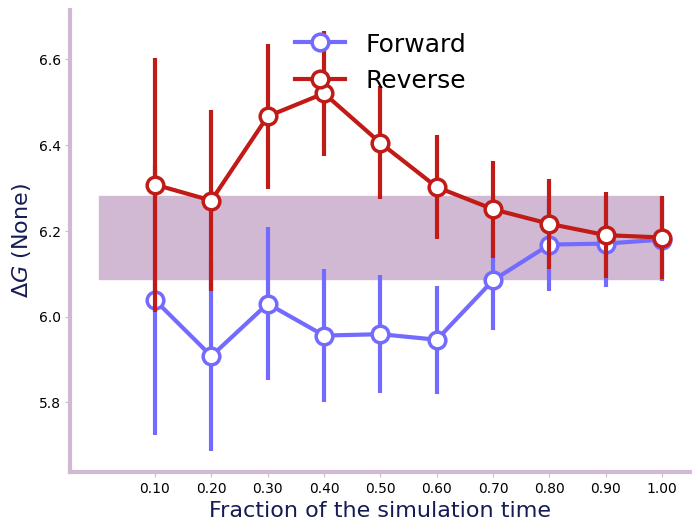

In [16]:
from alchemlyb.visualisation import plot_convergence
from alchemlyb.convergence import forward_backward_convergence
data_list = [extract_u_nk(xvg, T=Temp) for xvg in filelist]
df = forward_backward_convergence(data_list, 'mbar')
ax = plot_convergence(df)
ax.figure.savefig('dF_t.pdf')